In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.interpolate as sinterpolate
import scipy.io as sio

# Load trajectories

In [2]:
N = 23
trajs = []
full_trajs = []
for i in range(1, N + 1):
    print 'Loading unclean_trajs/traj%d.mat' % i
    trajs.append(sio.loadmat('unclean_trajs/traj%d.mat' % i)['traj'])
    full_trajs.append(sio.loadmat('unclean_trajs/traj%d.mat' % i))

Loading unclean_trajs/traj1.mat
Loading unclean_trajs/traj2.mat
Loading unclean_trajs/traj3.mat
Loading unclean_trajs/traj4.mat
Loading unclean_trajs/traj5.mat
Loading unclean_trajs/traj6.mat
Loading unclean_trajs/traj7.mat
Loading unclean_trajs/traj8.mat
Loading unclean_trajs/traj9.mat
Loading unclean_trajs/traj10.mat
Loading unclean_trajs/traj11.mat
Loading unclean_trajs/traj12.mat
Loading unclean_trajs/traj13.mat
Loading unclean_trajs/traj14.mat
Loading unclean_trajs/traj15.mat
Loading unclean_trajs/traj16.mat
Loading unclean_trajs/traj17.mat
Loading unclean_trajs/traj18.mat
Loading unclean_trajs/traj19.mat
Loading unclean_trajs/traj20.mat
Loading unclean_trajs/traj21.mat
Loading unclean_trajs/traj22.mat
Loading unclean_trajs/traj23.mat


# Analyzing data

1018
1054
796
999
770
762
871
764
826
764
761
874
807
774
758
664
661
781
727
681
675
742
742


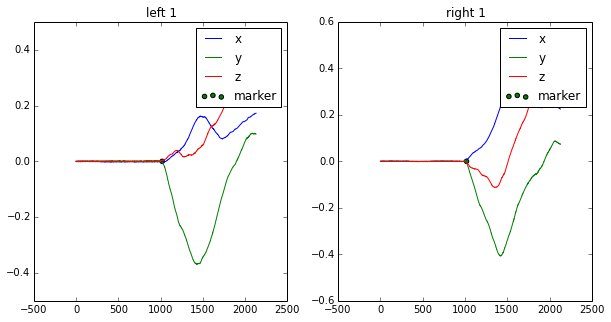

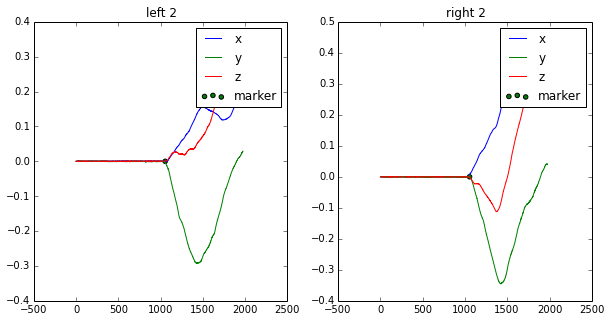

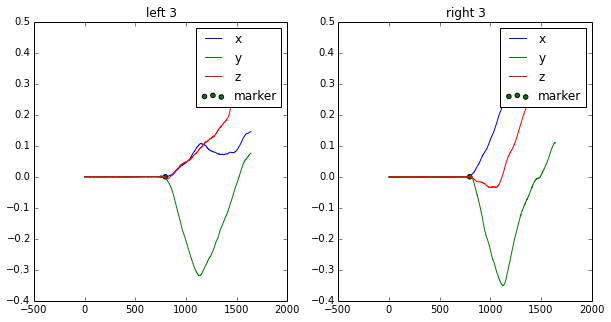

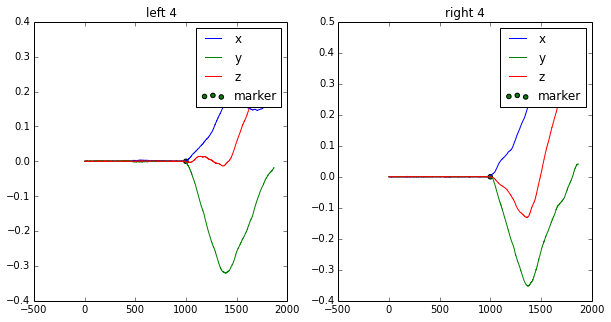

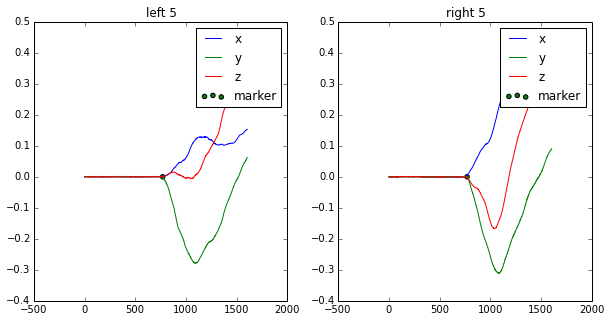

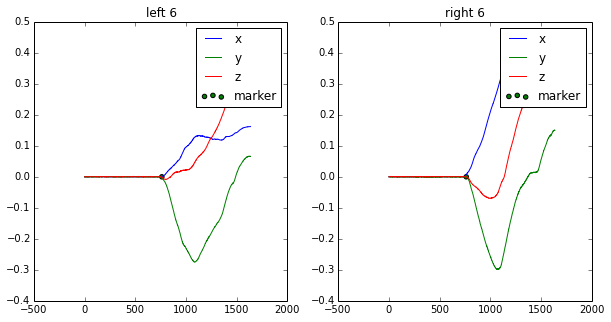

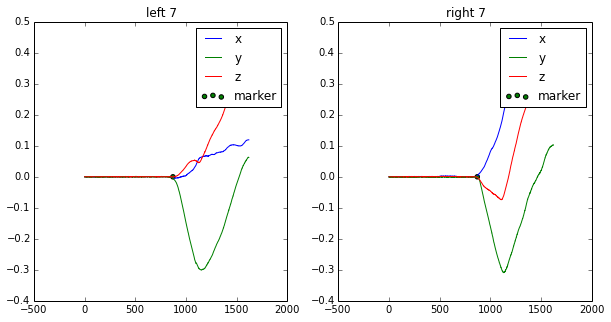

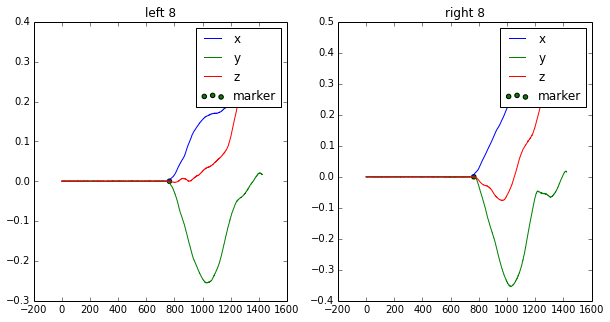

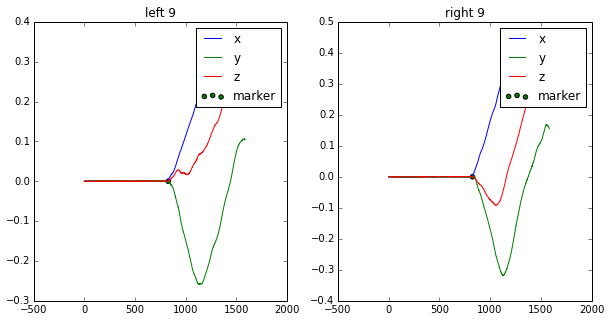

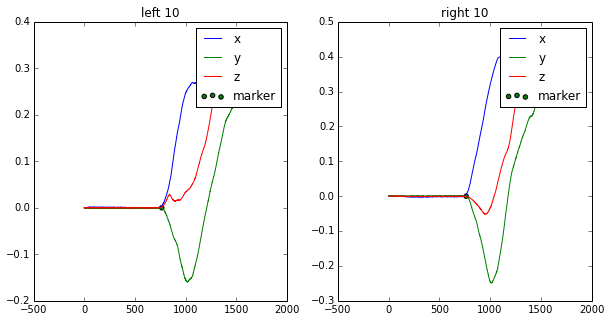

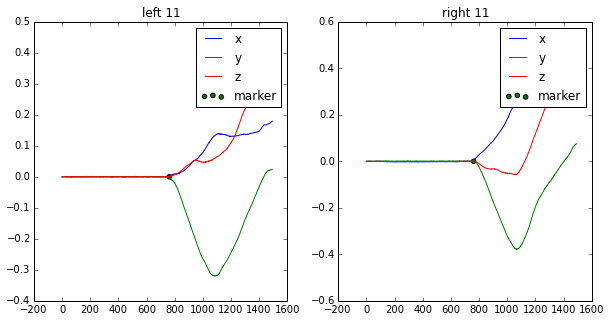

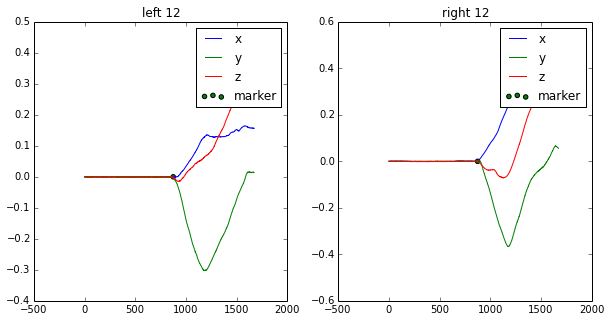

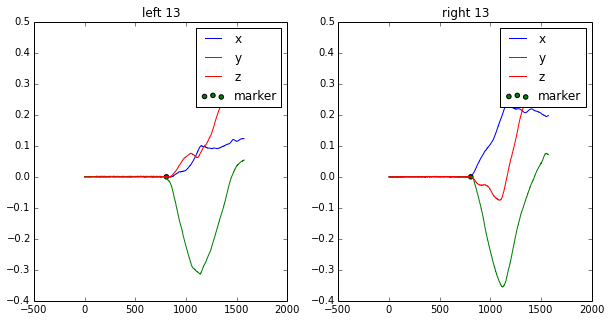

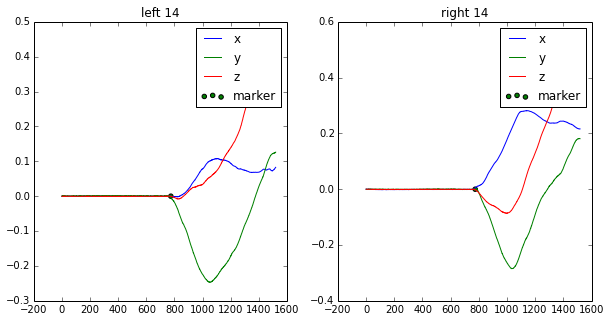

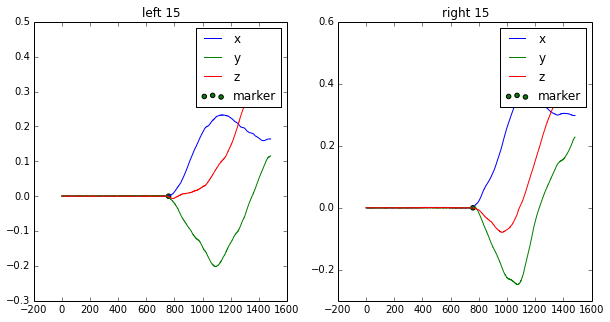

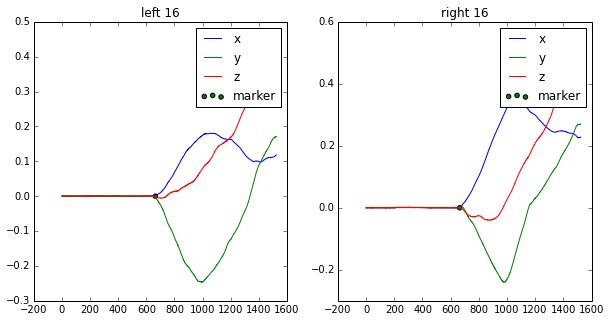

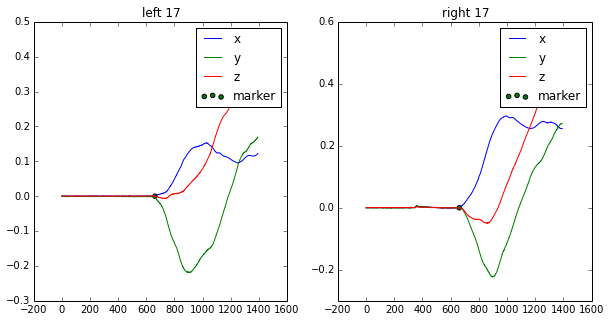

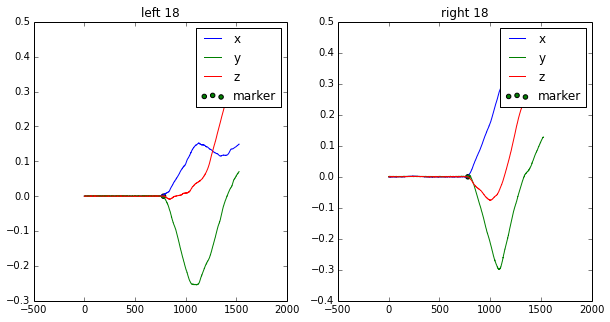

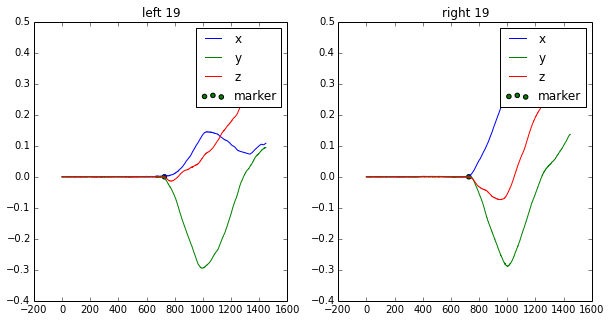

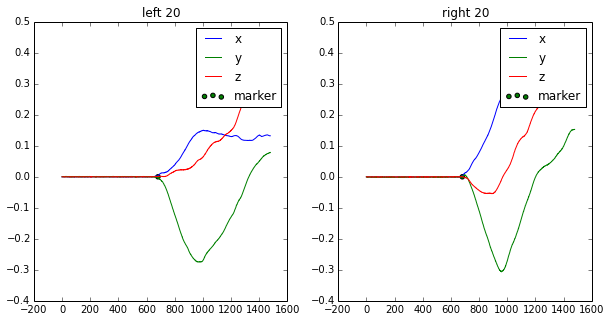

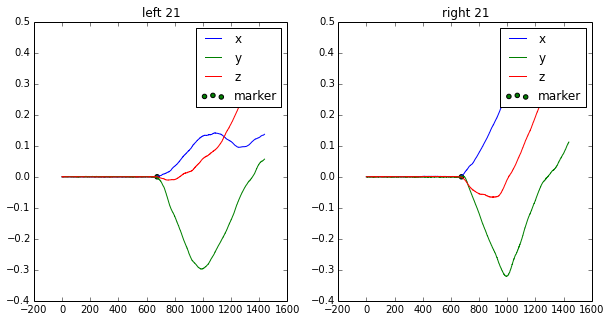

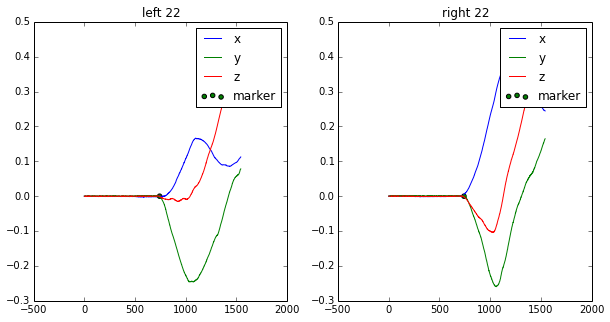

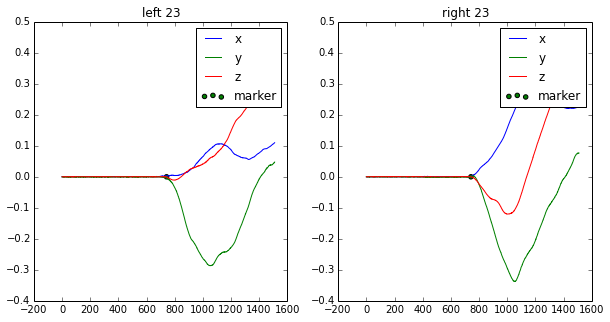

In [9]:
cutting_point = []

for i in range(N):
    l0 = trajs[i][:, 8:11]; l0 -= l0[0, :]
    r0 = trajs[i][:, 22:25]; r0 -= r0[0, :]
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axs[0].plot(l0)
    axs[1].plot(r0)
    
    #r, c = np.where(np.abs(np.hstack((l0, r0))) > 0.006)
    r, c = np.where(np.abs(l0) > 0.0035) # left is master limb
    print r[0]
    cutting_point.append(r[0])
    
    axs[0].set_title('left %d' % (i + 1))
    axs[1].set_title('right %d' % (i + 1))
    axs[0].scatter(r[0], 0, c='g', marker='o')
    axs[0].legend(['x', 'y', 'z', 'marker'])
    axs[1].scatter(r[0], 0, c='g', marker='o')
    axs[1].legend(['x', 'y', 'z', 'marker'])

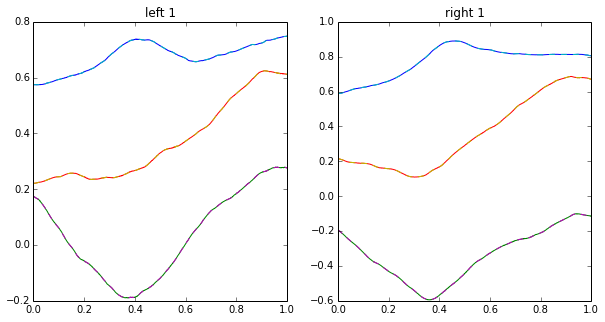

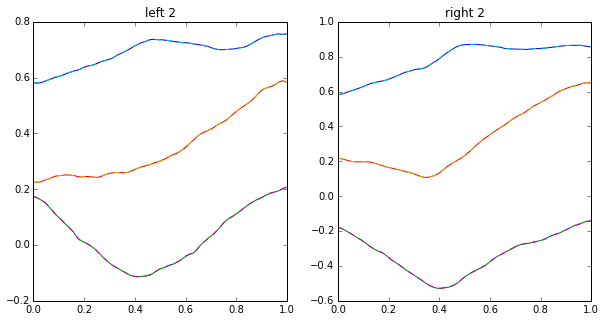

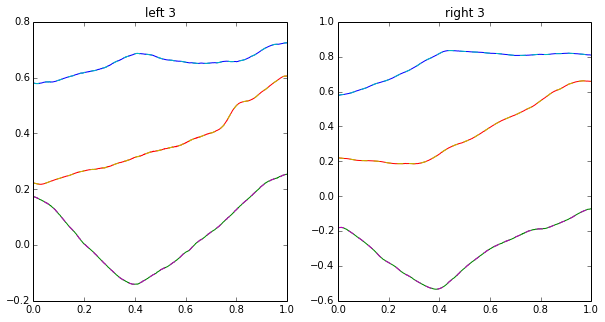

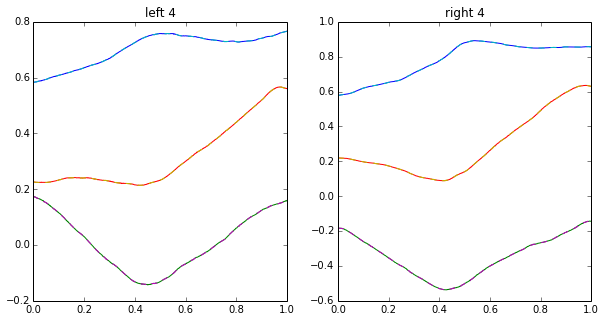

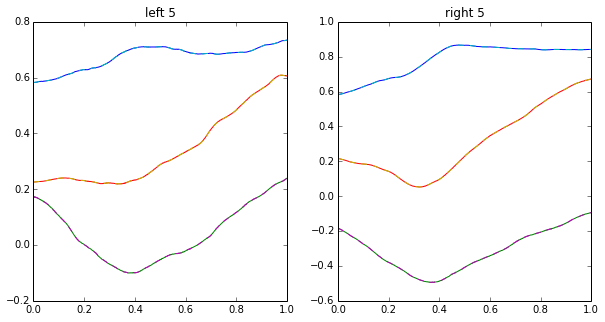

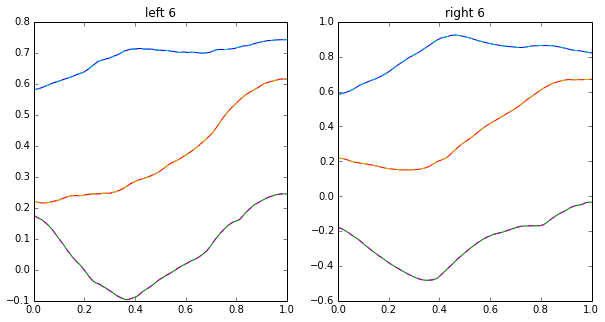

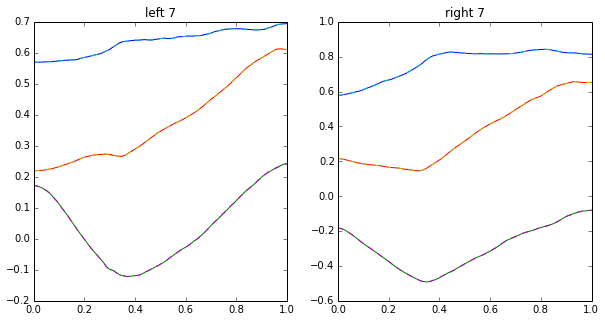

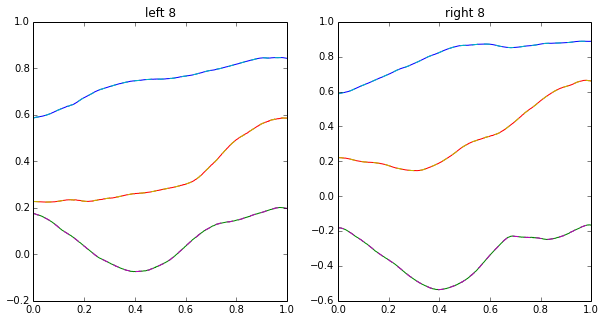

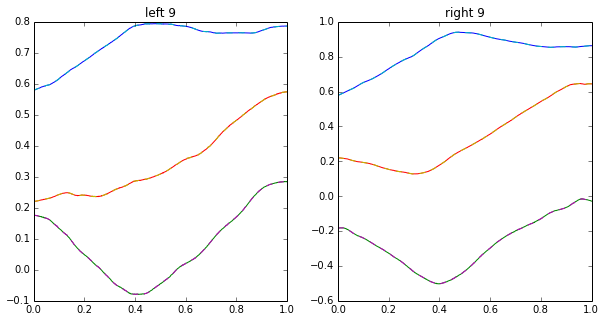

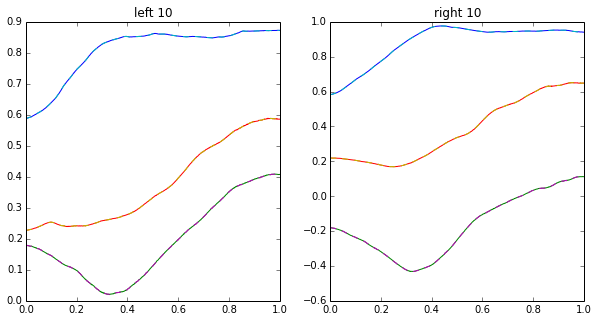

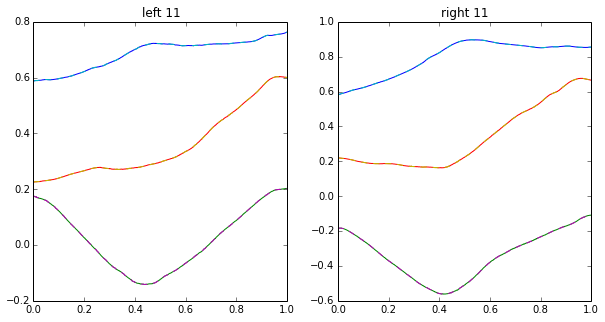

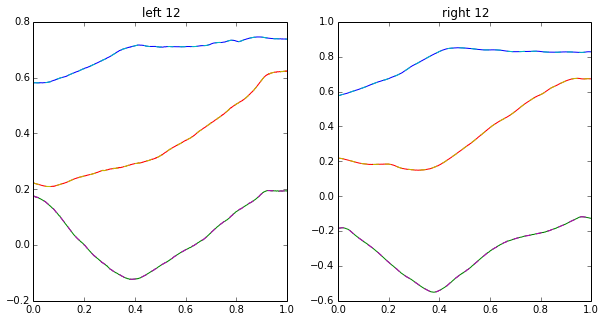

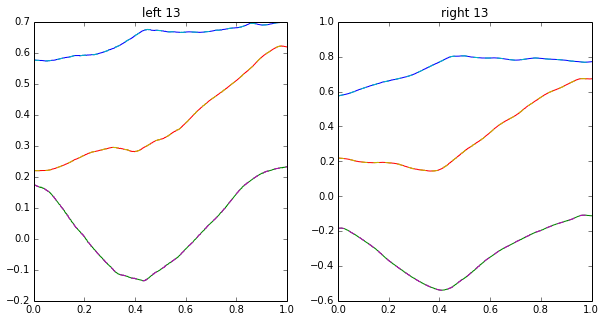

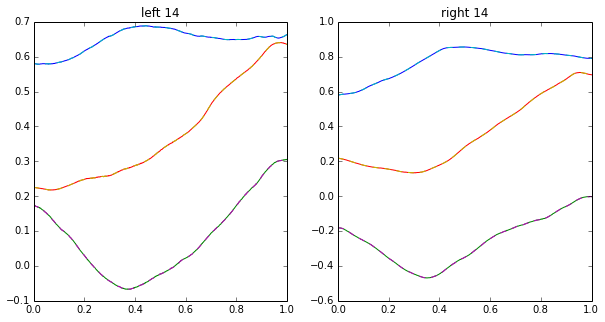

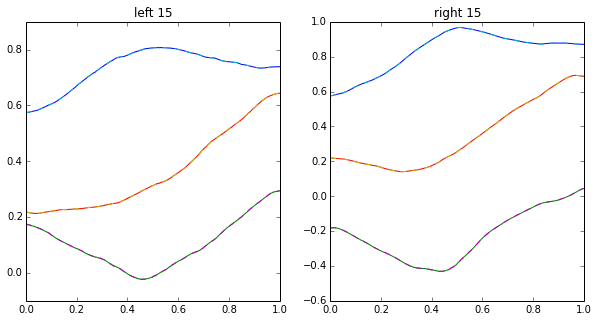

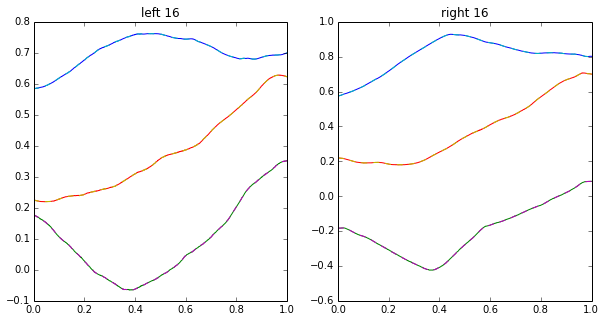

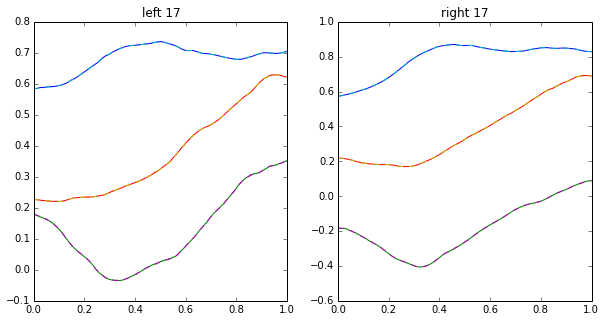

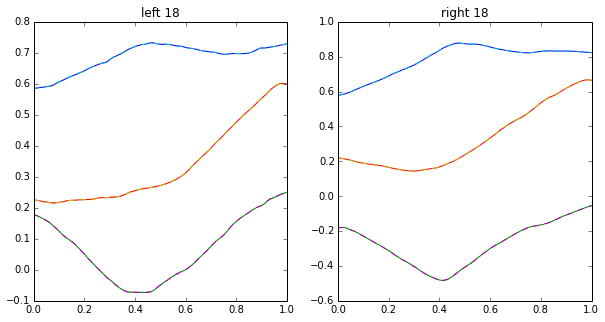

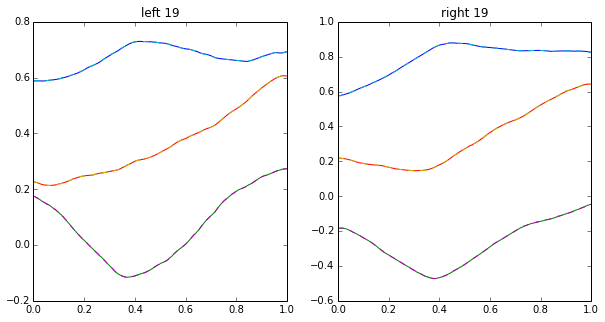

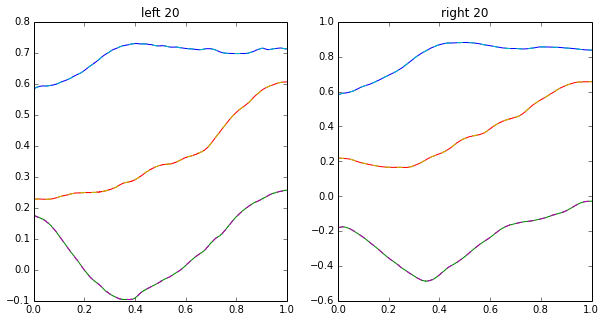

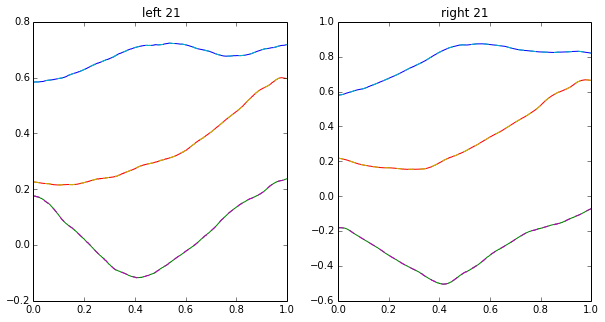

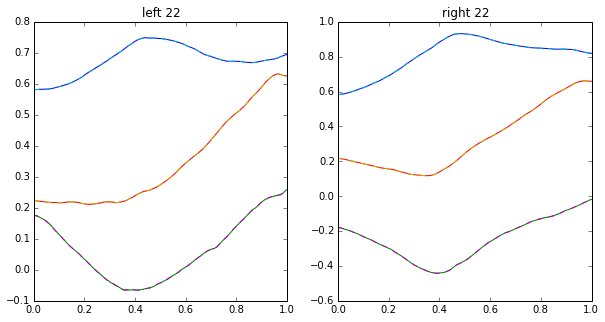

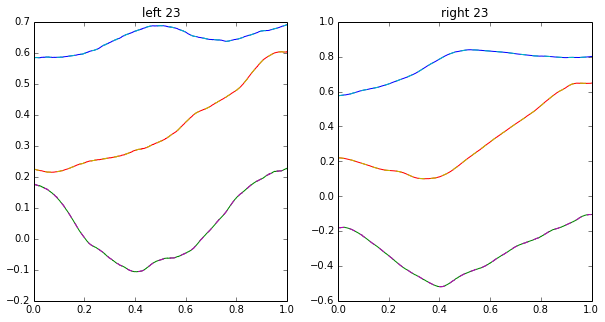

In [4]:
clean_trajs = {}
X_new = np.linspace(0, 1, 1 / 0.001)
for i in range(N):
    traj = full_trajs[i]['traj']
    
    # get relevant starting point
    traj = traj[cutting_point[i]:, :]
    
    # time starts at 0
    traj[:, 0] -= traj[0, 0]
    
    # reformulate time in order for all the trajectories to have the
    # exact same number of samples
    X = np.linspace(0, 1, traj.shape[0])
    
    # interpolate
    interp_fn = sinterpolate.interp1d(X, traj[:, 1:], axis=0)
    clean_traj = interp_fn(X_new)
    clean_traj = np.hstack((X_new[:, np.newaxis], clean_traj))
    
    clean_trajs[i + 1] = clean_traj
    
    # plot for visualization purposes
    lep = traj[:, 8:11]
    rep = traj[:, 22:25]
    clep = clean_traj[:, 8:11]
    rlep = clean_traj[:, 22:25]
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axs[0].set_title('left %d' % (i + 1))
    axs[1].set_title('right %d' % (i + 1))
    axs[0].plot(X, lep)
    axs[1].plot(X, rep)
    axs[0].plot(X_new, clep, '--')
    axs[1].plot(X_new, rlep, '--')
    

In [5]:
clean_trajs[23].shape

(1000, 29)

# Save trajectories

In [6]:
for i in range(N):
    # retrieve data
    target = full_trajs[i]['target']
    traj = clean_trajs[i + 1]

    # save again
    sio.savemat('traj%d.mat' % (i + 1), {'target': target, 'traj': traj})

In [69]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
pwd

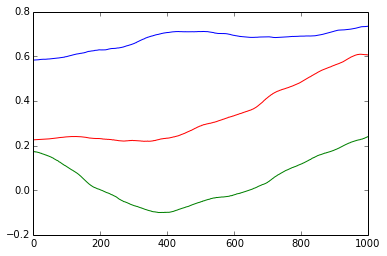

In [7]:
plt.plot(sio.loadmat('traj5.mat')['traj'][:, 8:11])